In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(sorted(df['label'].unique()))

['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


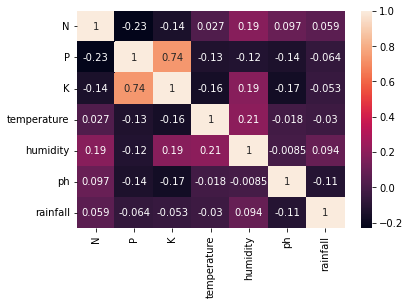

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =5)

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier(eval_metric = "mlogloss")
eval_s = [(Xtrain,Ytrain),(Xtest,Ytest)]
XB.fit(Xtrain,Ytrain,eval_metric=["merror","mlogloss"],eval_set=eval_s,early_stopping_rounds=15)

[0]	validation_0-merror:0.061932	validation_0-mlogloss:2.32505	validation_1-merror:0.065909	validation_1-mlogloss:2.32598
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 15 rounds.
[1]	validation_0-merror:0.030682	validation_0-mlogloss:1.93893	validation_1-merror:0.031818	validation_1-mlogloss:1.94866
[2]	validation_0-merror:0.020455	validation_0-mlogloss:1.65846	validation_1-merror:0.022727	validation_1-mlogloss:1.67188
[3]	validation_0-merror:0.018182	validation_0-mlogloss:1.44258	validation_1-merror:0.020455	validation_1-mlogloss:1.45934
[4]	validation_0-merror:0.015909	validation_0-mlogloss:1.27147	validation_1-merror:0.013636	validation_1-mlogloss:1.28955
[5]	validation_0-merror:0.014205	validation_0-mlogloss:1.1293	validation_1-merror:0.015909	validation_1-mlogloss:1.14875
[6]	validation_0-merror:0.013068	validation_0-mlogloss:1.00951	validation_1-merror:0.011364	validation

XGBClassifier(eval_metric='mlogloss', objective='multi:softprob')

In [ ]:
predicted_values =XB.predict(Xtest)
print(XB.predict(Xtest[7:15]))
print(XB.predict_proba(Xtest[7:15]))
print(max(XB.predict_proba(Xtest[7:15])[0]))
print(Xtest[7:15])
print(XB.predict(Xtest[7:15]))
x = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is: ", x)

['pomegranate' 'pigeonpeas' 'apple' 'coconut' 'papaya' 'pomegranate'
 'maize' 'blackgram']
[[6.45039196e-04 6.90314511e-04 4.78543923e-04 7.03593483e-04
  9.51319875e-04 8.21144320e-04 6.31359406e-04 6.76897413e-04
  5.55619830e-04 1.09090633e-03 5.62872097e-04 1.00385817e-03
  8.24152958e-04 7.44240009e-04 7.15462491e-04 8.44374183e-04
  8.14831816e-04 5.81848843e-04 5.50072873e-04 9.84139681e-01
  7.18750933e-04 1.25512143e-03]
 [2.71813566e-04 5.32135426e-04 3.36984522e-04 2.96487706e-04
  3.11926909e-04 5.29716432e-04 3.02224129e-04 2.85238231e-04
  1.97510541e-04 4.59697709e-04 3.28330992e-04 8.40825553e-04
  5.02126757e-04 5.14482148e-04 2.53976701e-04 3.55811382e-04
  3.00213287e-04 2.51033809e-04 9.92249966e-01 3.34320473e-04
  3.06405214e-04 2.38804831e-04]
 [9.94115233e-01 2.69048731e-04 7.59828181e-05 2.63321999e-04
  2.40161084e-04 1.12878566e-04 9.41573744e-05 1.57632900e-03
  8.14724335e-05 1.62691693e-04 1.02104379e-04 1.19203403e-04
  8.54092505e-05 1.06132073e-04 1.067

In [ ]:
results = XB.evals_result()

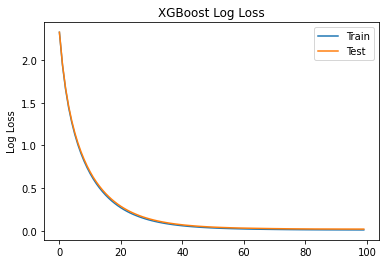

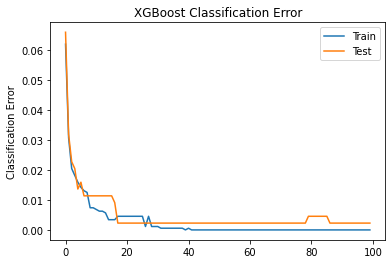

In [ ]:
# retrieve performance metrics
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
import pickle
filename = "xgbcrop.pickle"
pickle.dump(XB, open(filename, "wb"))


In [ ]:
XBf = 'XGBoost.pkl'
XB_Model_pkl = open(XBf, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

In [ ]:
loaded_model = pickle.load(open(filename, "rb"))
print(loaded_model.predict(Xtest[8:9]))
print(loaded_model.predict_proba(Xtest[8:9]))
print(Xtest[8:9])
print(Ytest[8:9])

['pigeonpeas']
[[2.7181357e-04 5.3213543e-04 3.3698452e-04 2.9648771e-04 3.1192691e-04
  5.2971643e-04 3.0222413e-04 2.8523823e-04 1.9751054e-04 4.5969771e-04
  3.2833099e-04 8.4082555e-04 5.0212676e-04 5.1448215e-04 2.5397670e-04
  3.5581138e-04 3.0021329e-04 2.5103381e-04 9.9224997e-01 3.3432047e-04
  3.0640521e-04 2.3880483e-04]]
      N   P   K  temperature   humidity       ph    rainfall
424  16  71  24    18.331248  38.409755  4.94637  139.648332
424    pigeonpeas
Name: label, dtype: object


In [ ]:
ef=pd.read_csv("cost.csv")

In [ ]:
ef[200:400]

,commodity_name,state,district,market,min_price,max_price,modal_price,date
200,Apple,Uttar Pradesh,Agra,Samsabad,56.0,60.0,57.5,5/22/2019
201,Apple,Uttar Pradesh,Hardoi,Shahabad(New Mandi),78.3,79.2,78.7,5/22/2019
202,Apple,Uttar Pradesh,Jaunpur,Shahganj,74.0,76.0,75.0,5/22/2019
203,Apple,Uttar Pradesh,Shahjahanpur,Shahjahanpur,0.0,0.0,56.0,5/22/2019
204,Apple,Uttar Pradesh,Firozabad,Sirsaganj,71.0,73.0,72.0,5/22/2019
...,...,...,...,...,...,...,...,...
395,Banana,Punjab,Jalandhar,Adampur,21.0,22.0,22.0,5/22/2019
396,Banana,Punjab,Bhatinda,Bhagta Bhai Ka,35.0,37.0,36.1,5/22/2019
397,Banana,Punjab,Faridkot,Faridkot,15.0,20.0,20.0,5/22/2019
398,Banana,Punjab,Ferozpur,Firozepur City,15.0,20.0,17.5,5/22/2019


In [ ]:
sorted(ef["commodity_name"].unique())

['Ajwan',
 'Alasande Gram',
 'Alasande+Gram',
 'Almond(Badam)',
 'Alsandikai',
 'Amaranthus',
 'Ambada+Seed',
 'Amla(Nelli Kai)',
 'Amla(Nelli+Kai)',
 'Amphophalus',
 'Antawala',
 'Anthorium',
 'Apple',
 'Arecanut(Betelnut/Supari)',
 'Arhar (Tur/Red Gram)(Whole)',
 'Arhar+Dal(Tur+Dal)',
 'Ashgourd',
 'Avare+Dal',
 'Balekai',
 'Bamboo',
 'Banana',
 'Banana+-+Green',
 'Barley+(Jau)',
 'Beans',
 'Beaten+Rice',
 'Beetroot',
 'Betal+Leaves',
 'Bitter+gourd',
 'Black+pepper',
 'Bottle+gourd',
 'Bran',
 'Brinjal',
 'Broken+Rice',
 'Bull',
 'Bunch+Beans',
 'Butter',
 'Cabbage',
 'Calf',
 'Capsicum',
 'Cardamoms',
 'Carrot',
 'Cashewnuts',
 'Castor+Seed',
 'Cauliflower',
 'Chapparad+Avare',
 'Chennangi+Dal',
 'Cherry',
 'Chikoos(Sapota)',
 'Chili+Red',
 'Chilly+Capsicum',
 'Chow+Chow',
 'Chrysanthemum(Loose)',
 'Cloves',
 'Cluster+beans',
 'Coca',
 'Cock',
 'Cocoa',
 'Coconut',
 'Coconut+Oil',
 'Coconut+Seed',
 'Coffee',
 'Colacasia',
 'Copra',
 'Coriander(Leaves)',
 'Corriander+seed',
 'Cotton

In [ ]:
data=ef[(ef["commodity_name"] =='Gram+Raw(Chholia)')|(ef["commodity_name"]=='Water+Melon') |(ef["commodity_name"]=='Apple')|(ef["commodity_name"]=='Banana')|(ef["commodity_name"]=='Alasande+Gram')|(ef["commodity_name"]=='Coconut')|(ef["commodity_name"]=='Coffee')|(ef["commodity_name"]=='Grapes' )|(ef["commodity_name"]=='Jute')|(ef["commodity_name"]=='Maize')| (ef["commodity_name"]=='Mango')| (ef["commodity_name"]=='Orange')|(ef["commodity_name"]=='Papaya')| (ef["commodity_name"]=='Pomegranate')|( ef["commodity_name"]=='Rice')]

In [ ]:
data["commodity_name"].unique()

array(['Alasande+Gram', 'Apple', 'Banana', 'Coconut', 'Coffee', 'Grapes',
       'Jute', 'Maize', 'Mango', 'Orange', 'Papaya', 'Pomegranate',
       'Rice', 'Water+Melon', 'Gram+Raw(Chholia)'], dtype=object)

In [ ]:
data.to_json(r'cost15.json')


In [ ]:
data.to_csv(r'cost15.csv')


In [ ]:
data


,commodity_name,state,district,market,min_price,max_price,modal_price,date
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,5/22/2019
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,5/22/2019
10,Alasande+Gram,Karnataka,Gadag,Laxmeshwar,22.15,46.41,36.54,5/22/2019
11,Alasande+Gram,Madhya Pradesh,Panna,Ajaygarh,41.00,46.20,42.00,5/22/2019
75,Apple,Chattisgarh,Durg,Durg,60.00,80.00,70.00,5/22/2019
...,...,...,...,...,...,...,...,...
834491,Apple,Uttrakhand,Haridwar,Roorkee,1500.00,3500.00,2800.00,10/12/2021
834492,Apple,Uttrakhand,UdhamSinghNagar,Rudrapur,2000.00,4000.00,3000.00,10/12/2021
834493,Apple,West Bengal,Kolkata,Mechua,7200.00,9400.00,8500.00,10/12/2021
834494,Apple,West Bengal,Kolkata,Mechua,8300.00,7400.00,0.00,10/12/2021


In [ ]:
datadest=data[(data["commodity_name"]=="Apple")&(data["district"]=="Durg")] 

In [ ]:
data[data["district"]=="Durg"].shape[0]>0 and data[data["commodity_name"]=="Alasande+Gram"].shape[0]>0

True

In [ ]:
datadest["date"].str[-2:]

In [ ]:
yearset=set(datadest["date"].str[-2:])
print(yearset)

{'19', '21'}


In [ ]:
for y in yearset:
  datay=datadest[datadest["date"].str[-2:]==y]
  monthset=set(datay["date"].str[:2])
  for m in monthset:
    cost=datay[datay["date"].str[:2]==m]
    print(y,m)
    ma=cost["modal_price"].max()
    mi=cost["modal_price"].min()
    av=cost["modal_price"].mean()
    if ma<500 and mi<500 and av<500:
      print(m,y)
      print(ma,mi,av)


19 6/
6/ 19
90.0 75.0 81.66666666666667
19 10
10 19
60.0 60.0 60.0
19 9/
9/ 19
85.0 85.0 85.0
19 12
12 19
105.0 105.0 105.0
19 7/
7/ 19
150.0 100.0 127.5
19 11
11 19
95.0 65.0 80.0
19 5/
5/ 19
140.0 70.0 100.0
21 5/
5/ 21
195.0 120.0 170.625
21 10


In [ ]:
datay=datadest[datadest["date"].str[-2:]=='19']

In [ ]:
monthset=set(datay["date"].str[:2])

In [ ]:
print(monthset)

{'6/', '10', '9/', '12', '7/', '11', '5/'}


In [ ]:
for i in monthset:
  cost=datay[datay["date"].str[:2]==i]
  print(i)
  print(cost["modal_price"].max(),cost["modal_price"].min())


6/
90.0 75.0
10
60.0 60.0
9/
85.0 85.0
12
105.0 105.0
7/
150.0 100.0
11
95.0 65.0
5/
140.0 70.0


In [ ]:
data["date"].str[:1]

8         5
9         5
10        5
11        5
75        5
         ..
834491    1
834492    1
834493    1
834494    1
834495    1
Name: date, Length: 118770, dtype: object